# 2440016804 - Rio Pramana - LA01 - Assignment 4

## 1. Do Exploratory Data Analysis for Fish Market dataset

#### Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset, downloaded file is in the same folder
csv_path = "fish.csv"
fish_df = pd.read_csv(csv_path)

#### Check dataset (Shape, Info)

In [3]:
fish_df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish_df.shape

(159, 7)

In [5]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


No anomaly in any of the data type

#### Check missing value

In [6]:
fish_df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

There is no missing value

#### Data Summarization

In [7]:
fish_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


There is a __weird value__ on the __Weight__ column. There is a fish with 0 Weight, that shouldn't make sense. To handle this, we will remove the outlier (row with Weight == 0)

Checking which row has Weight == 0 :

In [8]:
fish_df.loc[fish_df['Weight'] == 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


Only row with index 40 has this weird value of Weight, so we will remove it.

In [9]:
# Removing the outlier
i = fish_df[fish_df.Weight == 0].index #Take the index
new_fish_df = fish_df.drop(i) #Drop the row

In [10]:
new_fish_df.shape

(158, 7)

In [11]:
new_fish_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


The outlier has been removed and the dataset is more normal

#### Plotting number of fish for each species on a bar graph

<AxesSubplot:>

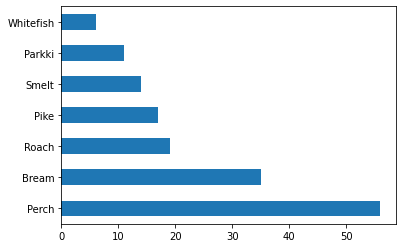

In [12]:
new_fish_df.Species.value_counts().plot(kind = "barh")

#### Checking the correlation between data

<AxesSubplot:>

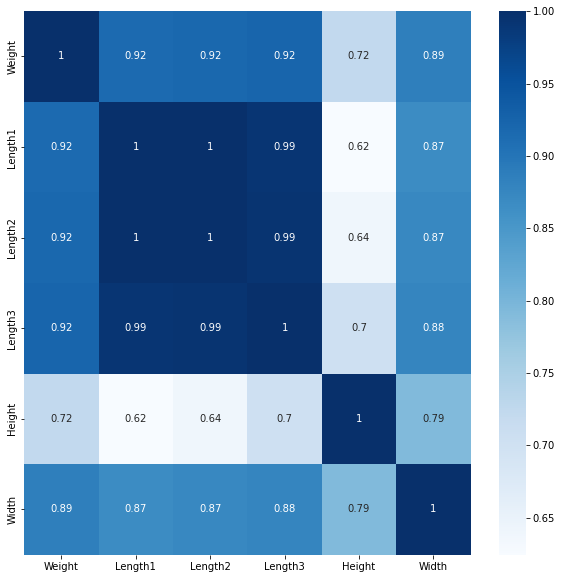

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(new_fish_df.corr(),cbar=True,annot=True,cmap='Blues')

From the correlation matrix above, we can see that Weight have positive correlations with every other variable

## 2. Please check Pairwise Relationships in a dataset using Pairplot

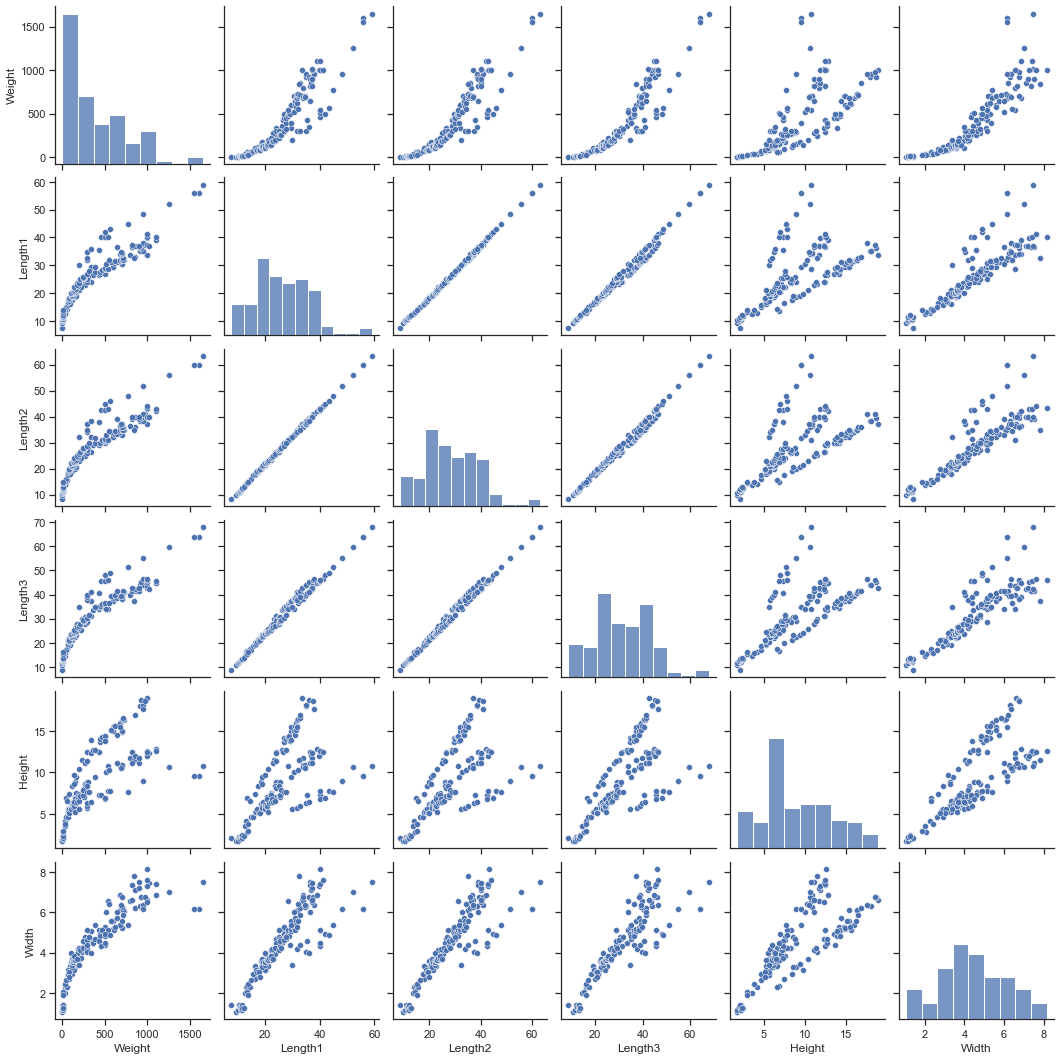

In [14]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(new_fish_df)
plt.show()

From the correlation matrix and pairwise relationships shown, we can see the positive correlation where the Weight will increase as the other variable increases

## 3. Prepared Training and Test Dataset

To make feature extraction easier, we will move the dependent variable (Weight) to be the last column

In [15]:
fish_list = new_fish_df.copy()
cols_at_end = ['Weight']
fish_list = fish_list[[c for c in fish_list if c not in cols_at_end] 
        + [c for c in cols_at_end if c in fish_list]]
fish_list.head(5)

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


#### Extracting independent and dependent variables

In [16]:
#Extracting independent variables:
x = fish_list.iloc[:, :-1].values #Extract semua kolom kecuali kolom terakhir
print(x)

[['Bream' 23.2 25.4 30.0 11.52 4.02]
 ['Bream' 24.0 26.3 31.2 12.48 4.3056]
 ['Bream' 23.9 26.5 31.1 12.3778 4.6961]
 ['Bream' 26.3 29.0 33.5 12.73 4.4555]
 ['Bream' 26.5 29.0 34.0 12.444 5.134]
 ['Bream' 26.8 29.7 34.7 13.6024 4.9274]
 ['Bream' 26.8 29.7 34.5 14.1795 5.2785]
 ['Bream' 27.6 30.0 35.0 12.67 4.69]
 ['Bream' 27.6 30.0 35.1 14.0049 4.8438]
 ['Bream' 28.5 30.7 36.2 14.2266 4.9594]
 ['Bream' 28.4 31.0 36.2 14.2628 5.1042]
 ['Bream' 28.7 31.0 36.2 14.3714 4.8146]
 ['Bream' 29.1 31.5 36.4 13.7592 4.368]
 ['Bream' 29.5 32.0 37.3 13.9129 5.0728]
 ['Bream' 29.4 32.0 37.2 14.9544 5.1708]
 ['Bream' 29.4 32.0 37.2 15.438 5.58]
 ['Bream' 30.4 33.0 38.3 14.8604 5.2854]
 ['Bream' 30.4 33.0 38.5 14.938 5.1975]
 ['Bream' 30.9 33.5 38.6 15.633 5.1338]
 ['Bream' 31.0 33.5 38.7 14.4738 5.7276]
 ['Bream' 31.3 34.0 39.5 15.1285 5.5695]
 ['Bream' 31.4 34.0 39.2 15.9936 5.3704]
 ['Bream' 31.5 34.5 39.7 15.5227 5.2801]
 ['Bream' 31.8 35.0 40.6 15.4686 6.1306]
 ['Bream' 31.9 35.0 40.5 16.2405 5.5

In [17]:
#Extracting dependent variable:
y = fish_list.iloc[:, 6].values #Extract kolom terakhir
print(y)

[ 242.   290.   340.   363.   430.   450.   500.   390.   450.   500.
  475.   500.   500.   340.   600.   600.   700.   700.   610.   650.
  575.   685.   620.   680.   700.   725.   720.   714.   850.  1000.
  920.   955.   925.   975.   950.    40.    69.    78.    87.   120.
  110.   120.   150.   145.   160.   140.   160.   169.   161.   200.
  180.   290.   272.   390.   270.   270.   306.   540.   800.  1000.
   55.    60.    90.   120.   150.   140.   170.   145.   200.   273.
  300.     5.9   32.    40.    51.5   70.   100.    78.    80.    85.
   85.   110.   115.   125.   130.   120.   120.   130.   135.   110.
  130.   150.   145.   150.   170.   225.   145.   188.   180.   197.
  218.   300.   260.   265.   250.   250.   300.   320.   514.   556.
  840.   685.   700.   700.   690.   900.   650.   820.   850.   900.
 1015.   820.  1100.  1000.  1100.  1000.  1000.   200.   300.   300.
  300.   430.   345.   456.   510.   540.   500.   567.   770.   950.
 1250.  1600.  1550.

From the independent variables shown, we can see that there is a categorical data (Species). So, we will have to encode it using One Hot Encoding

#### Encoding categorical data (Species)

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
ct = ColumnTransformer([("Species", OneHotEncoder(), [0])], remainder = 'passthrough')
#[0] menunjukkan kolom yang diencode
x = ct.fit_transform(x)
print(x)

[[1.0 0.0 0.0 ... 30.0 11.52 4.02]
 [1.0 0.0 0.0 ... 31.2 12.48 4.3056]
 [1.0 0.0 0.0 ... 31.1 12.3778 4.6961]
 ...
 [0.0 0.0 0.0 ... 13.8 2.277 1.2558]
 [0.0 0.0 0.0 ... 15.2 2.8728 2.0672]
 [0.0 0.0 0.0 ... 16.2 2.9322 1.8792]]


#### Split dataset menjadi training set dan test set

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

We choose to split the dataset into 80/20 set because usually that's the standard. Another reason is that the dataset only contains 159 rows (158 after removing outlier), so taking 20% as the test size is good because we get a good amount of data for testing (around 30-31 data). Taking only a small amount of data for testing (Say 10-15 data) could be risky because if these 10-15 data points are from the most abnormal regions of the dataset, the model will perform worse.

## 5. Predict Weight Fish each Species

In [21]:
#Fitting the MLR model to the training set:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [22]:
#Predicting the Test set and Training set result;
y_test_pred= regressor.predict(x_test)
y_train_pred= regressor.predict(x_train)

In [23]:
#check the score for training dataset and test dataset
print('Train Score: ', regressor.score(x_train, y_train))
print('Test Score: ', regressor.score(x_test, y_test))

Train Score:  0.9377625177306101
Test Score:  0.885683370845778


## 6. Plot with scatter of predict result

#### Scatter plot for y_training

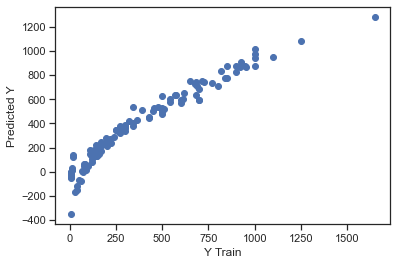

In [24]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Y Train')
plt.ylabel('Predicted Y')
plt.show()

#### Scatter plot for y_test

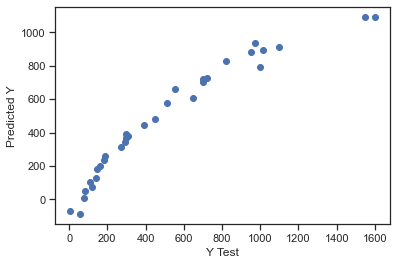

In [25]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()